## Module 3 Exercise: Reverse Engineer, Research Libraries, Describe What's Happening

In this exercise we are showing you a way of making sense of data that is similar to what you have done so far, but instead of you doing a blank exercise, we are asking you to explain what's happening in the cells. This is python, while much of this module has been explained using R. 

**double click on the explanation markdown to edit it with your answers**

#### Cell 1

In [1]:
import scipy.cluster.hierarchy as hca
import pandas as pd
import numpy as np
from pylab import *
from matplotlib import pyplot
%matplotlib inline
np.set_printoptions(suppress=True)
data=pd.read_csv("/dsa/data/DSA-8630/mini_project/pantheon-project/database.csv")
data.head()


,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
0,308,Aristotle,Male,-384,Stageira,NaN,Greece,Europe,40.33333,23.50000,Philosopher,Philosophy,Humanities,152,56355172,370758,31.9938
1,22954,Plato,Male,-427,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,142,46812003,329662,31.9888
2,1095706,Jesus Christ,Male,-4,Judea,NaN,Israel,Asia,32.50000,34.90000,Religious Figure,Religion,Institutions,214,60299092,281771,31.8981
3,25664190,Socrates,Male,-469,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,137,40307143,294213,31.6521
4,783,Alexander the Great,Male,-356,Pella,NaN,Greece,Europe,40.80000,22.51667,Military Personnel,Military,Institutions,138,48358148,350421,31.584


#### Cell 1 Explanation
In the space below explain the following: 
What are the libraries being imported and what are the main functions? 

scipy.cluster.hierarchy library - this library consists of functions related to hierarchichal clustering of data. the packages in this library facilitate a number of useful operations that include cutting of hierarchichal clusterings into flat clustering and agglomerative clustering. Packages in this library also allow for computing statistics on hierarchies as well as visualizing flat clusters.
pandas - this is a python library used for data manipulation and analysis. it works well for manipulating tables and time series.
numpy - this is a python library used mostly for working with arrays and matrices.
pylab - from what i can tell, pylab is embedded inside of matplotlib. it imports portions of matplotlib and numpy and helps provide a simpler matplotlib experience.
pyplot - sounds very similar to pylab in that it combines matplotlib and numpy and provides a matlab-like plotting framework.
matplotlib - is a 2D python plotting library


---

What is the nature of the data?  In other words, scanning the data itself, it should be somewhat clear what the data is about. Your description does not need to be long, just clear. 

briefly scanning the head of the dataframe, the data looks to be about various famous people? and how often they are searched for or looked up on the web.

---


#### Cell 2

In [2]:
data1=data.drop(data.columns[[0,1,2,3,4,5,6,7,10,11,12]],axis=1)

#### Cell 2 Explanation
What data is being dropped? 

Variables article_id, full_name, sex, birth_year, city, state, country, continent, occupation, industry, and domain are being removed from the dataframe.

---

Why do you think the data is being dropped? What analytical goals or limitations are served by dropping this data?

i would guess that the analysis will focus specifically on the searches/page views of the famous people. by dropping this data, it removes variables that are not needed in the analysis.

--- 




#### Cell 4

In [3]:
data1.head()

,latitude,longitude,article_languages,page_views,average_views,historical_popularity_index
0,40.33333,23.50000,152,56355172,370758,31.9938
1,37.96667,23.71667,142,46812003,329662,31.9888
2,32.50000,34.90000,214,60299092,281771,31.8981
3,37.96667,23.71667,137,40307143,294213,31.6521
4,40.80000,22.51667,138,48358148,350421,31.584


#### Cell 4 Explanation

How do the data types remaining help to explain the data dropped above?

the remaining data seems to indicate that the focus of this analysis would be on the page views of these philosophers and the location the interest comes from

---

What are 2 or 3 questions you might be able to answer using these remaining columns? Put your answers in the context of what you understand the data above to be? 

where are the most popular views coming from? what location? what language are the most views in? what are the least number of views? 

---

#### Cell 5

In [4]:
data1.isnull().any()

latitude                        True
longitude                       True
article_languages              False
page_views                     False
average_views                  False
historical_popularity_index    False
dtype: bool

#### Cell 5 Explanation
What does the presenece or absence of null values tell you about the analysis you will need to perform on this data? 

the prescence of null values may alter or skew the location variables. null values will need to be replaced or removed.

---



#### Cell 6

In [5]:
for col in data1:
    print(col,data[col].dtypes)

latitude float64
longitude float64
article_languages object
page_views object
average_views object
historical_popularity_index object


#### Cell 6 Explanation

What do the data types for each object tell you about:

a. The meaning or non-meaning of null values?

null values for the float64 data types will alter any analysis


----

b. What kind of analysis choices are available to you with regards to the remaining data types? 

the float64 variables should be analyzed without much issue, save for the null values.
any function relying on numeric calculations will probably not work with the variables labeled object.

----

#### Cell 7

In [6]:
data1['latitude']=data1['latitude'].fillna((data1['latitude'].mean()))
data1['longitude']=data1['longitude'].fillna((data1['longitude'].mean()))

#### Cell 7 Explanation

What is being done in cell 7? 

cell 7 is filling null values in the longitude and latitude columns with mean longitude and latitude values.

----

Do you think it was necessary, based on what we've done so far? 

i do think this will help flatten and normalize these variables a bit.

----

#### Cell 8

In [7]:

num_data=data1.convert_objects(convert_numeric=True)

/usr/lib/python3.4/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


#### Cell 8 Explanation

What do you think cell 8 accomplished with regards to the dataset and the datatypes for the columns? 

cell 8 is converting object types to numeric.

-----

**Answer this question before you answer the next question**

#### Cell 8, Part Two

In [8]:
#### Place code in this cell to evaluate the data types of the data frame at this moment in time. 
for col in num_data:
    print(col,num_data[col].dtypes)


latitude float64
longitude float64
article_languages float64
page_views float64
average_views float64
historical_popularity_index float64


#### Cell 9

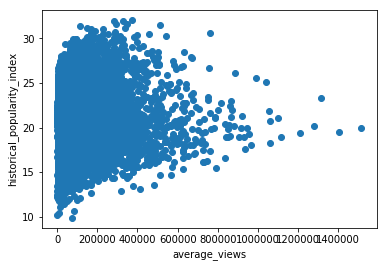

In [9]:
plt.scatter(num_data.iloc[:,4],num_data.iloc[:,5])
xlabel('average_views')
ylabel('historical_popularity_index')
plt.show()

#### Cell 9 Explanation

What is this plot showing you?  

this plot is showing the relationship between average views and historical popularity

----

What data is being plotted?

x= average_views
y= historical_popularity_index

---

Can you figure out how to add labels to the plot? 

added above

xlabel('average_views')
ylabel('historical_popularity_index')


----

#### Cell 10

In [10]:
rows1 = pd.Series(data1.loc[data1['article_languages'] == "Not Provided"].index)
invalid_data1 = data1.loc[(rows1),]
#print(invalid_data1)
rows2 = pd.Series(data1.loc[data1['page_views'] == "Not Provided"].index)
invalid_data2 = data1.loc[(rows2),]
# print(invalid_data2)
rows3 = pd.Series(data1.loc[data1['average_views'] == "Not Provided"].index)
invalid_data3 =data1.loc[(rows3),]
# print(invalid_data3)
rows4 = pd.Series(data1.loc[data1['historical_popularity_index'] == "Not Provided"].index)
invalid_data4 = data1.loc[(rows4),]

invalid_data1 = invalid_data1.append(invalid_data2)
invalid_data1 = invalid_data1.append(invalid_data3)
invalid_data1 = invalid_data1.append(invalid_data4)

invalid_data1.drop_duplicates()

,latitude,longitude,article_languages,page_views,average_views,historical_popularity_index
10262,35.11737,-89.97107,Not Provided,7130053,274233,16.9662
10579,-34.60333,-58.38167,Not Provided,2846258,94875,16.1673
10665,47.36667,8.55000,31,Not Provided,25973,15.9405
11323,40.40000,-3.68333,28,Not Provided,Not Provided,Not Provided
11335,51.91667,4.50000,27,Not Provided,21404,11.3956
11216,46.05556,14.50833,26,229486,8826,Not Provided
11321,-14.46667,132.26667,26,463947,17844,Not Provided


#### Cell 10 Explanation

What is being done in this cell? 

empty varibles are being populated with 'Not Provided'

------


Why do you think that is being done? 

to identify missing data


-----

#### Cell 11

In [11]:
data1=data1.drop(data1.index[[11321,11216,11335,11323,10665,10579,10262]])

#### Cell 11 Explanation:

What's happening in this cell?

the rows with missing data are being removed from data1

----




#### Cell 12

In [12]:
num_data=num_data.drop(num_data.index[[11312,11216,11335,11323,10665,10579,10262]])

#### Cell 12 Explanation

What is this cell doing that is different than Cell 11? 

this cell is removing the same rows from num_data rather than data1

-----

#### Cell 13

In [13]:
z = hca.linkage(data1,'ward')

#### Cell 13 Explanation

What does "hca.linkage" do? (Hint: Look at how the libraries are aliased above and use a google search to identify the API.  Believe it or not, this is something data scientists pretty much do every day. :) )

hca linkage calculates the distance between paired or clustered data. the ward method specifically, if i'm understanding it correctly, is more of a generalized clustering approach where choosing the pair of clusters to merge is based on the best purpose of the analysis.

---------

#### Cells 14 & 15

In [14]:
data1.isnull().sum()

latitude                       0
longitude                      0
article_languages              0
page_views                     0
average_views                  0
historical_popularity_index    0
dtype: int64

In [15]:
num_data.isnull().sum()

latitude                       0
longitude                      0
article_languages              0
page_views                     0
average_views                  0
historical_popularity_index    1
dtype: int64

#### Cells 14 and 15 explanation

What is being calcualated here?

the sum of all possible null values in each column

----

What do you think the purpose of checking these calculations might be? 

to make sure the two datasets have no missing data

----

#### Cell 16

In [16]:
num_data['historical_popularity_index'] = num_data['historical_popularity_index'].fillna((num_data['historical_popularity_index'].mean()))



#### Cell 16 Explanation

What is cell 16 doing? 

this cell is filling the null value in the historical_popularity_index variable in num_data withe the mean of that column


-----

Does it relate to cells 13, 14, or 15? If so, how? 

cell 13 seems to be related specifically to data1. i'm not sure how addressing the null value in num_data relates to data1.

---

#### Cell 17

In [17]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, cop_dist = cophenet(z, pdist(num_data))
c

0.65461174079192153

#### Cell 17 Explanation
Cell 17 imports a few new libraries from scipy that you might want to look up. Do not go to great lengths to master your understanding of what's happening. Look through the line
```python
c, cop_dist = cophenet(z, pdist(num_data))
```
And suggest what the intention of this analysis step might be. 


i believe this analysis step is determining how similar data needs to be in order to be clustered together and also calculating the spatial distance of the clustered data. ultimately, this is a measure of how accurately linked the clustered data is. the closer to 1 the better.

-----


#### Cell 18

In [18]:
y=hca.linkage(num_data,metric="euclidean",method="ward")

#### Cell 19

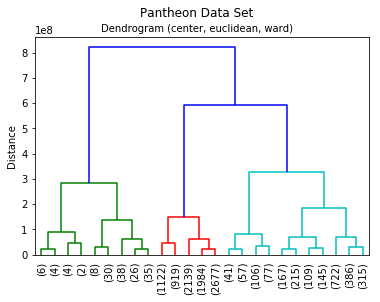

In [19]:
plt=hca.dendrogram(y,truncate_mode="lastp",p=25)
xticks(rotation=90)
ylabel("Distance")
figtext(0.5,0.95,"Pantheon Data Set",ha="center",fontsize=12)
figtext(0.5,0.90,"Dendrogram (center, euclidean, ward)",ha="center",fontsize=10)

#### Cell 18 & 19 Explanation

What are cells 18 and 19 doing? 

cell 18 is calculating the hca.linkage of the num_data dataframe using metric euclidean and method ward

-----

What does the dendogram in cell 19 show you. Read from the bottom up. Remember, each point at the bottom is a cluster. each connecting line is a grouping together of the  most similar clusters.  The Y-Axis is the distance between clusters. 

the dendogram is showing similar data grouped together by cluster. the five clusters represent five groups of data that have similar relationships between historical_popularity_index and average_views.


----

#### Remaining Cells
Look over the remaining cells and comments however you wish. Make comments or observations at the bottom of the notebook. Feel free to play with datasets and parameters as well. 

In [20]:
from scipy.cluster.hierarchy import fcluster
k=5
clusters = fcluster(y, k, criterion='maxclust')
pd.value_counts(pd.Series(clusters))

3    8841
5    2059
4     281
2     137
1      16
dtype: int64

In [21]:
size(data)

192797

In [22]:
num_data["cluster"] = clusters
grouped = num_data.groupby('cluster')
cluster1 = num_data[num_data['cluster']==1]

In [23]:
cluster1

,latitude,longitude,article_languages,page_views,average_views,historical_popularity_index,cluster
5,43.78333,10.91667,174.0,88931135.0,511098.0,31.4644,1
14,48.25833,13.03500,169.0,128368798.0,759579.0,30.5778,1
17,52.19000,-1.71000,163.0,74882297.0,459401.0,30.4398,1
22,48.40000,9.98333,166.0,89771090.0,540790.0,30.2106,1
1506,41.59556,-87.34528,147.0,145250649.0,988100.0,25.5247,1
2020,37.75775,-87.11839,80.0,83016743.0,1037709.0,25.1155,1
2329,21.30000,-157.81667,200.0,112536577.0,562683.0,24.8890,1
3176,37.78333,-122.41667,122.0,78372660.0,642399.0,24.4062,1
5181,39.75806,-94.83667,83.0,108953700.0,1312695.0,23.2988,1
7470,32.69139,-16.94528,87.0,91677973.0,1053770.0,21.8203,1


In [24]:
#This is cluster 1 in the original data.
cluster1_data=data.iloc[[9097,8793,8656,8296,8048,8010,7470,5181,3176,2329,2020,1506,22,17,14,5]]
cluster1_data


,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
9097,23680998,Justin Bieber,Male,1994,London,NaN,Canada,North America,42.98370,-81.24970,Singer,Music,Arts,94,113558067,1208065,19.3922
8793,6844407,Selena Gomez,Female,1992,Grand Prairie,TX,United States,North America,32.71528,-97.01694,Singer,Music,Arts,96,87742946,913989,19.9708
8656,8135890,Miley Cyrus,Female,1992,Nashville,TN,United States,North America,36.16667,-86.78333,Actor,Film And Theatre,Arts,72,91947733,1277052,20.19
8296,2110323,Rihanna,Female,1988,Saint Michael Parish,NaN,Barbados,North America,13.11667,-59.60000,Singer,Music,Arts,85,89939558,1058112,20.7355
8048,17782843,Lady Gaga,Female,1986,New York,NY,United States,North America,40.71270,-74.00590,Musician,Music,Arts,133,104562647,786185,21.1045
8010,2150841,Lionel Messi,Male,1987,Rosario,NaN,Argentina,South America,-32.95000,-60.66667,Soccer Player,Team Sports,Sports,95,82454215,867939,21.1608
7470,623737,Cristiano Ronaldo,Male,1985,Santo António,NaN,Portugal,Europe,32.69139,-16.94528,Soccer Player,Team Sports,Sports,87,91677973,1053770,21.8203
5181,4429395,Eminem,Male,1972,Saint Joseph,MO,United States,North America,39.75806,-94.83667,Singer,Music,Arts,83,108953700,1312695,23.2988
3176,7412236,Steve Jobs,Male,1955,San Francisco-Bay Area,CA,United States,North America,37.78333,-122.41667,Designer,Design,Arts,122,78372660,642399,24.4062
2329,534366,Barack Obama,Male,1961,Honolulu,HI,United States,North America,21.30000,-157.81667,Politician,Government,Institutions,200,112536577,562683,24.889


In [25]:
num_data["cluster"] = clusters
grouped = num_data.groupby('cluster')
cluster2 = num_data[num_data['cluster']==2]

In [26]:
rows1 = pd.Series(num_data.loc[num_data['cluster']==2].index)
invalid_data1 = data.loc[(rows1),]
invalid_data1

,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
0,308,Aristotle,Male,-384,Stageira,NaN,Greece,Europe,40.33333,23.50000,Philosopher,Philosophy,Humanities,152,56355172,370758,31.9938
1,22954,Plato,Male,-427,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,142,46812003,329662,31.9888
2,1095706,Jesus Christ,Male,-4,Judea,NaN,Israel,Asia,32.50000,34.90000,Religious Figure,Religion,Institutions,214,60299092,281771,31.8981
3,25664190,Socrates,Male,-469,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,137,40307143,294213,31.6521
4,783,Alexander the Great,Male,-356,Pella,NaN,Greece,Europe,40.80000,22.51667,Military Personnel,Military,Institutions,138,48358148,350421,31.584
7,15924,Julius Caesar,Male,-100,Rome,NaN,Italy,Europe,41.90000,12.50000,Politician,Government,Institutions,128,43088745,336631,31.1161
12,18934,Muhammad,Male,570,Mecca,NaN,Saudi Arabia,Asia,21.41667,39.81667,Religious Figure,Religion,Institutions,150,43026648,286844,30.65
15,33163,Wolfgang Amadeus Mozart,Male,1756,Salzburg,NaN,Austria,Europe,47.80000,13.03333,Composer,Music,Arts,177,51363334,290188,30.5146
18,21019,Michelangelo,Male,1475,Caprese Michelangelo,NaN,Italy,Europe,43.63333,11.98333,Painter,Fine Arts,Arts,158,39992803,253119,30.4383
20,69880,Napoleon Bonaparte,Male,1769,Corsica,NaN,France,Europe,41.92670,8.73690,Politician,Government,Institutions,145,57559307,396961,30.3263


Looking at some of the variables.There is no clear discernible pattern used by the algorithm to cluster the data.And again no wonder why the cophenetic correlation coefficient is .64.
The algorithm did not do a good job clustering this data.

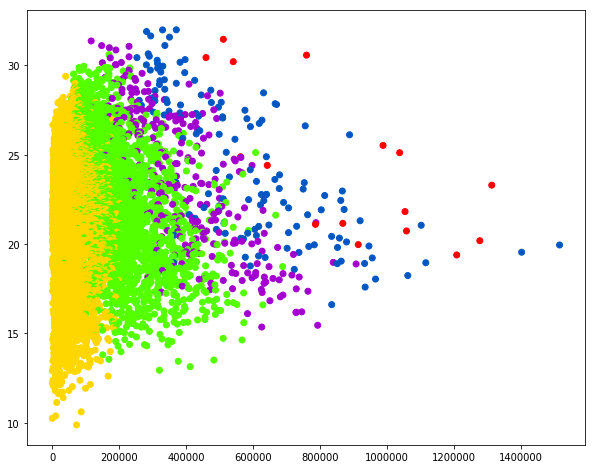

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.scatter(num_data.iloc[:,4], num_data.iloc[:,5], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()

Looking at this visualization it is no wonder why cophenetic correlation  coefficient is 65.46%

In [28]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
data=num_data[['average_views','historical_popularity_index']]
data=data.as_matrix().astype('float32',copy=False)

In [29]:
stscaler = StandardScaler().fit(data)
data = stscaler.transform(data)

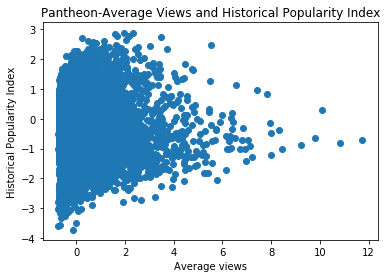

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(data[:,0], data[:,1])
plt.xlabel("Average views")
plt.ylabel("Historical Popularity Index")
plt.title("Pantheon-Average Views and Historical Popularity Index")

In [31]:
dbscan = DBSCAN(eps = .5, min_samples = 1500).fit(data)

In [32]:
import numpy as np

labels = dbscan.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbscan.core_sample_indices_] = True

In [33]:
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))

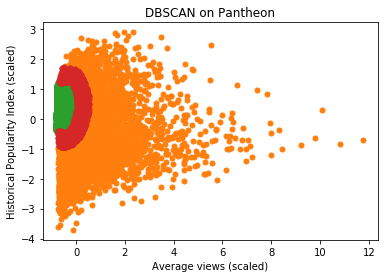

In [34]:
for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    xy = data[class_member_mask & core_samples]
    plt.plot(xy[:,0],xy[:,1], 'o', markersize = 10)
    
    xy2 = data[class_member_mask & ~core_samples]
    plt.plot(xy2[:,0],xy2[:,1], 'o', markersize = 5)
    
plt.title("DBSCAN on Pantheon")
plt.xlabel("Average views (scaled)")
plt.ylabel("Historical Popularity Index (scaled)")

the points with large average views figures tend to be classified as outliers.

#### Comments and Observations about remaining Cells



Here

First off, grouping the data by cluster number helps understand things a little better. At the very least the scatter plot makes more sense. Now that I can make out the different clusters, I understand why the algorithm did not do a very good job of clustering the data. This also explains a little more clearly for me why the cophenetic correlation coeeficient represents what it does. I see that 65% is not a very good 'score' for the algorithm.

The DBSCAN makes a little more sense for me here too. It quite literally finds core areas of high density clustering. This reminds me quite a bit of a heat map. The green area is the highest concentration of clustering, the red slightly less, and the orange represents the least dense concentration of clustering.

In the end, I'm still not completely sure what pattern emerges or what is the consistent throughline grouping each cluster together...

----




----

# Save your notebook!

You're done!